<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_Flood/blob/master/Flood_Map/20201110_NYC_oneper_demo_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background



# New York City flood risk data

**Data Description**
This is the 100-Year Floodplain for the 2020s based on FEMA's Preliminary Work Map data and the New York Panel on Climate Change's 90th Percentile Projects for Sea-Level Rise (11 inches). Please see the Disclaimer PDF for more information. Data Provided by the Mayor's Office of Long-Term Planning and Sustainability (OLTPS) on behalf of CUNY Institute for Sustainable Cities (CISC) and the New York Panel on Climate Change (NPCC).

Reference:

[NYC Open Data (2020)](https://data.cityofnewyork.us/Environment/Sea-Level-Rise-Maps-2020s-100-year-Floodplain-/ezfn-5dsb) Seal Level Rise Maps (2020s 100-year Floodplain)

[NPCC(2013)]("https://data.cityofnewyork.us/api/assets/1F7A128D-4F0D-430C-A98E-53E44CFFCAD7?download=true") Climate Risk Information 2013 Observations, Climate Change, Projections, and Maps

**NYC flood related policy and background**

* Records show that maximum daily summer temperatures have been rising at rates of 0.5°F per decade at JFK Airport and 0.7°F per decade at LaGuardia Airport since 1970. Sea level recorded at The Battery in lower Manhattan continues to rise at a rate of 0.11 inches per year since 1850.
* Economic losses from hurricanes and floods have significantly increased in past decades and are likely to increase further in the future from more intense hurricanes and higher sea level rise.
* *The report finds that areas with lower incomes and the highest percentages of African American and Hispanic residents are consistently more likely to suffer the impacts of climate change. The panel advises that community engagement is critical for more effective and flexible adaptation efforts in the most at-risk communities.*
* To help manage the dynamic climate and public policy contexts, the NPCC 2019 report recommends that the city put in place a coordinated indicator and monitoring system to enable the city and its communities to better monitor climate change trends, impacts, vulnerability, and adaptation measures. The report also notes that property insurance can be a catalyst for infrastructure resilience by encouraging investment in adaptation measures prior to a disaster through a reduction in premiums.

References:

[NPCC(2019)](https://www.nyas.org/annals/special-issue-advancing-tools-and-methods-for-flexible-adaptation-pathways-and-science-policy-integration-new-york-city-panel-on-climate-change-2019-report-vol-1439/) Special Issue: Advancing Tools and Methods for Flexible Adaptation Pathways and Science Policy Integration 

[Columbia University Earth Institute website (2019)]("https://blogs.ei.columbia.edu/2019/03/15/npcc-report-2019-climate-change-nyc/") New York City Panel on Climate Change Releases 2019 Report


More References:

[NPCC website(2020)](https://www1.nyc.gov/site/orr/challenges/nyc-panel-on-climate-change.page) New York City Panel on Climate Change Flood Zones 



# Basic Data Description 

In [ ]:
#@ install geospatial packages
!sudo apt install libspatialindex-dev
!pip install geopandas
!pip install census
!pip install CensusData
!pip install us
#!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (723 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.

In [ ]:
# Basic package
import geopandas as gp
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from shapely.geometry import shape

# census 
import censusdata
from census import Census
from us import states

# Advanced package
import gdal 
from gdalconst import *
from collections import Counter
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#  mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Geospatial data

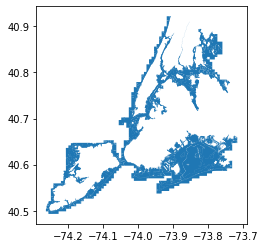

In [ ]:
# Download geospatial data
fnyc = gp.read_file("https://data.cityofnewyork.us/api/geospatial/ezfn-5dsb?method=export&format=GeoJSON", low_memory=False)
fnyc.plot()

In [ ]:
fnyc.dtypes

fld_zone        object
shape_area      object
join_count      object
gridcode        object
shape_leng      object
static_bfe      object
id              object
orig_fid        object
abfe_0_2pc      object
target_fid      object
geometry      geometry
dtype: object

In [ ]:
fnyc.head()

,fld_zone,shape_area,join_count,gridcode,shape_leng,static_bfe,id,orig_fid,abfe_0_2pc,target_fid,geometry
0,,0.0,0,900,0.0,0.0,2,0,0,0,"MULTIPOLYGON (((-73.91020 40.91784, -73.91020 ..."
1,,0.0,0,900,0.0,0.0,4,1,0,0,"MULTIPOLYGON (((-73.90993 40.91544, -73.91016 ..."
2,,0.0,0,900,0.0,0.0,5,2,0,0,"MULTIPOLYGON (((-73.91147 40.91345, -73.91147 ..."
3,,0.0,0,1200,0.0,0.0,6,3,0,0,"MULTIPOLYGON (((-73.91165 40.91283, -73.91875 ..."
4,,0.0,0,1200,0.0,0.0,7,4,0,0,"MULTIPOLYGON (((-73.91129 40.91256, -73.91165 ..."


# Census tract data

# Socioeconomic demographic data

2019 American Community Survey 1-Year Data

the first release of documentation in support of the 2019 American Community Survey 1-year estimates scheduled for release on Thursday, September 17, 2020. 

[Code Lists, Definitions, and Accuracy]("https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html")

Uniuted States Census Bureau: https://data.census.gov/cedsci/

* First: get a census API key - you have to request it by email: 
https://api.census.gov/data/key_signup.html
* HW4: create a csv file called myapis.csv and upload it on your google drive in the main folder (My Drive). The code I shared as a skeleton notebook will read it in and your API key will be known in the notebook solong as you call it myapis.csv.




In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
ls

 기타/
 운동/
 자산관리/
'1. Research Experience'/
'2019.01.04-05 New York.zip'
'미국 정착 2019 Bill .gsheet'
 2020.01.08..ipynb
 2020.10.26._Flooding_midterm.gslides
'2020 List of Online Collections.gsheet'
'2020 List of Online Collections.xlsx'
 20DSPP_kay/
 20GEOG_AdvGIS_Assignments/
 20MLPP_kay/
'2. Work Experience'/
'3. Community Service'/
'4. Language'/
'5. 추억 사진'/
'American Government.pdf'
 Background.zip
'body line.gsheet'
'[BWRN 2020-2] 10월 발표 사전 설문조사.gform'
 BWRN-ADP/
'Climate Change and Society.pdf'
'Colab Notebooks'/
 congress_tweets_2019.tsv
 Elantra_Price_2020.08.21..gsheet
'ENEP250 - Survey on the choices for assignments .gform'
 flooding/
 gst_dem_fig_5_11.png
'Handbook of STS.pdf'
'ITA_Climate Change Politics(2019.08.12.) ver.3.gslides'
 KAT_Group_Final/
'Local Adaptation Plan of Action (LAPA), Pildonibolo village (Jamoat Pildon, Jirgatol District), Tajikistan.docx'
 log_emissions.png
 mlpp20/
 mlpp20_group/
 myapi_20201116.csv
 myapi.csv
 my

In [ ]:
myAPIkey =  pd.read_csv("myapis_20201108.csv")["census"]
c = Census(myAPIkey)

In [ ]:
#censusdata.search('acs5', 2018, 'concept', 'median income')

In [ ]:
censusdata.censustable('acs5', 2018, 'B06011')
# 'B06011_001E',{'concept': 'MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES',
#               'label': 'Estimate!!Median income in the past 12 months --!!Total',
#               'predicateType': 'int'})

# censusdata.printtable(censusdata.censustable('acs5', 2018, 'B06011')),

OrderedDict([('B06011_001E',
              {'concept': 'MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES',
               'label': 'Estimate!!Median income in the past 12 months --!!Total',
               'predicateType': 'int'}),
             ('B06011_002E',
              {'concept': 'MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES',
               'label': 'Estimate!!Median income in the past 12 months --!!Total!!Born in state of residence',
               'predicateType': 'int'}),
             ('B06011_003E',
              {'concept': 'MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES',
               'label': 'Estimate!!Median income in the past 12 months --!!Total!!Born in other state of the United States',
               'predicateType': 'int'}),
             ('B06011_004E',
              {'con

In [ ]:
# censusdata.geographies(censusdata.censusgeo([('state', '36'), ('county', '*')]), 'acs5', 2018)
# Bronx: 'Bronx County, New York': censusgeo((('state', '36'), ('county', '005'))),
# Brooklyn: Kings County, New York': censusgeo((('state', '36'), ('county', '047'))),
# Manhattan: 'New York County, New York': censusgeo((('state', '36'), ('county', '061'))),
# Queens: 'Queens County, New York': censusgeo((('state', '36'), ('county', '081'))),
# Staten Island: 'Richmond County, New York': censusgeo((('state', '36'), ('county', '085'))),

b_income = pd.concat([censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '36'), ('county', i), ('tract', '*')]), ["B06011_001E"]) for i in ["005"]])
k_income = pd.concat([censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '36'), ('county', i), ('tract', '*')]), ["B06011_001E"]) for i in ["047"]])
n_income = pd.concat([censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '36'), ('county', i), ('tract', '*')]), ["B06011_001E"]) for i in ["061"]])
q_income = pd.concat([censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '36'), ('county', i), ('tract', '*')]), ["B06011_001E"]) for i in ["081"]])
r_income = pd.concat([censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '36'), ('county', i), ('tract', '*')]), ["B06011_001E"]) for i in ["085"]])

In [ ]:
pd.concat([b_income, k_income, n_income, q_income, r_income])

,B06011_001E
"Census Tract 429.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:042902",18167
"Census Tract 330, Bronx County, New York: Summary level: 140, state:36> county:005> tract:033000",21807
"Census Tract 358, Bronx County, New York: Summary level: 140, state:36> county:005> tract:035800",31383
"Census Tract 371, Bronx County, New York: Summary level: 140, state:36> county:005> tract:037100",19418
"Census Tract 385, Bronx County, New York: Summary level: 140, state:36> county:005> tract:038500",13343
...,...
"Census Tract 170.12, Richmond County, New York: Summary level: 140, state:36> county:085> tract:017012",40313
"Census Tract 244.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:024402",51591
"Census Tract 277.05, Richmond County, New York: Summary level: 140, state:36> county:085> tract:027705",35029
"Census Tract 277.06, Richmond County, New York: Summary level: 140, state:36> county:085> tract:027706",35709


#Data preprocessing 

# Bonus: WRI global flood risk data

In [ ]:
fstate = gp.read_file("/content/drive/My Drive/flooding/data/WRI_data/aqueductglobalfloodriskdatabystate20150304/aqueduct_global_flood_risk_data_by_state_20150304.shp")
friverbasin = gp.read_file("/content/drive/My Drive/flooding/data/WRI_data/aqueductglobalfloodriskdatabyriverbasin20150304/aqueduct_global_flood_risk_data_by_river_basin_20150304.shp")
fcountry = gp.read_file("/content/drive/My Drive/flooding/data/WRI_data/aqueductglobalfloodriskdatabycountry20150304/aqueduct_global_flood_risk_data_by_country_20150304.shp")

In [ ]:
friverbasin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
print(fstate.crs)
print("")
print(friverbasin.crs)
print("")
print(fcountry.crs)

epsg:4326

epsg:4326

epsg:4326


In [ ]:
fstate.bounds.head()

,minx,miny,maxx,maxy
0,-70.062408,12.417670,-69.876820,12.632148
1,62.651763,34.509367,65.047327,36.031732
2,60.486778,32.782056,64.482504,35.630901
3,66.330608,33.937929,68.282685,35.469618
4,66.247874,35.667255,68.189099,37.385213


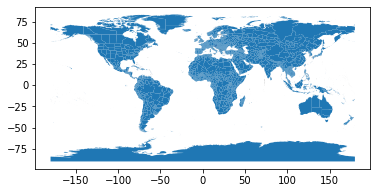

In [ ]:
fstate.plot()

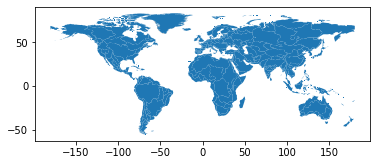

In [ ]:
friverbasin.plot()

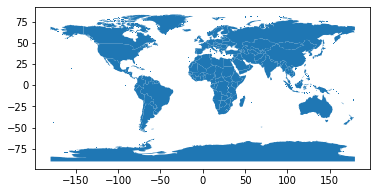

In [ ]:
fcountry.plot()